# Welcome

---

## Covid - 19  

Predicting next 7-days 2019-nCoV cumulative **Confirmed**, **Infected**, **Recovered**, **Death** cases using **Linear Regression Model**  

- **Category:** Linear Regression  
- **Dataset:** Novel Corona Virus 2019 Dataset  
- **Dataset Link:** [https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset](https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset)

---

## Dataset description:

| Column Name | Description |
|--------------|-------------|
| **SNo** | Serial Number |
| **ObservationDate** | Observation date in mm/dd/yyyy |
| **Province/State** | Province or State (əyalət və ya ştat) |
| **Country/Region** | Country or region |
| **Last Update** | Last update date time in UTC |
| **Confirmed** | Cumulative number of confirmed cases |
| **Deaths** | Cumulative number of deaths |
| **Recovered** | Cumulative number of recovered cases |
| **Infected** | *Confirmed - Recovered - Deaths* (bunun datasetdə ayrıca sütunu yoxdur) |

---

## Task

You are a **Data Scientist** working for the **World Health Organization (WHO)**.  
Due to the outbreak of **2019-nCoV**, WHO is alerted to several cases of pneumonia and wants to know how this virus will affect the population.  

Your task is to:
1. Analyze the Covid-19 dataset  
2. Build a **Linear Regression Model**  
3. Predict the next **7 days** cumulative **Confirmed**, **Recovered**, and **Death** cases  
4. Visualize the results clearly with appropriate charts  

---

## Steps to follow:
1. Import required libraries  
2. Load and explore the dataset  
3. Clean and preprocess the data  
4. Apply Linear Regression model  
5. Evaluate model performance  
6. Predict and visualize results  

---

## Output Example:
- Graph showing **Actual vs Predicted Cases**  
- Table showing **Next 7 Days Forecast**  
- Model metrics: R² score, MSE  




In [138]:

import pandas as pd
import numpy as np
import copy
import missingno as msno
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder


# Data Understanding and Preparation


In [139]:
data = pd.read_csv('covid_19_data.csv')


In [140]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [141]:
df=copy.deepcopy(data)

In [142]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [143]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [144]:
df.columns = df.columns.str.strip().str.lower().str.replace('[^a-zA-Z0-9]', '_', regex=True)

In [145]:
df.columns
df.head()

,sno,observationdate,province_state,country_region,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [146]:
df.index=df.sno
df.head()

,sno,observationdate,province_state,country_region,last_update,confirmed,deaths,recovered
sno,,,,,,,,
1,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [147]:
try:
    df.drop('sno',axis=1,inplace=True)
    print('Deleted')
except:
    print('This column not exist!')

Deleted


In [148]:
df.head()

,observationdate,province_state,country_region,last_update,confirmed,deaths,recovered
sno,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# Analyzing
4 different models - 1) Confirmed: 2) Infected; 3) Recovered; 4) Death; 

In [149]:
df.shape

(6722, 7)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6722 entries, 1 to 6722
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   observationdate  6722 non-null   object 
 1   province_state   3953 non-null   object 
 2   country_region   6722 non-null   object 
 3   last_update      6722 non-null   object 
 4   confirmed        6722 non-null   float64
 5   deaths           6722 non-null   float64
 6   recovered        6722 non-null   float64
dtypes: float64(3), object(4)
memory usage: 420.1+ KB


In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
confirmed,6722.0,601.195924,4896.332140,0.0,2.0,13.0,108.0,67800.0
deaths,6722.0,19.855846,204.486922,0.0,0.0,0.0,1.0,3122.0
recovered,6722.0,226.341267,2556.035202,0.0,0.0,0.0,11.0,56927.0


In [152]:
df.shape

(6722, 7)

In [153]:
df.isnull().sum()

observationdate       0
province_state     2769
country_region        0
last_update           0
confirmed             0
deaths                0
recovered             0
dtype: int64

In [154]:
df.isna().sum()

observationdate       0
province_state     2769
country_region        0
last_update           0
confirmed             0
deaths                0
recovered             0
dtype: int64

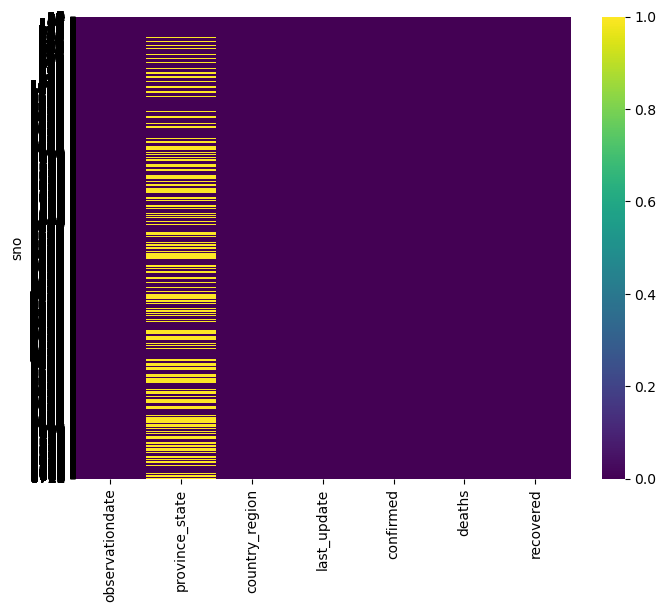

In [155]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=True, yticklabels=True)
plt.show()

<Axes: >

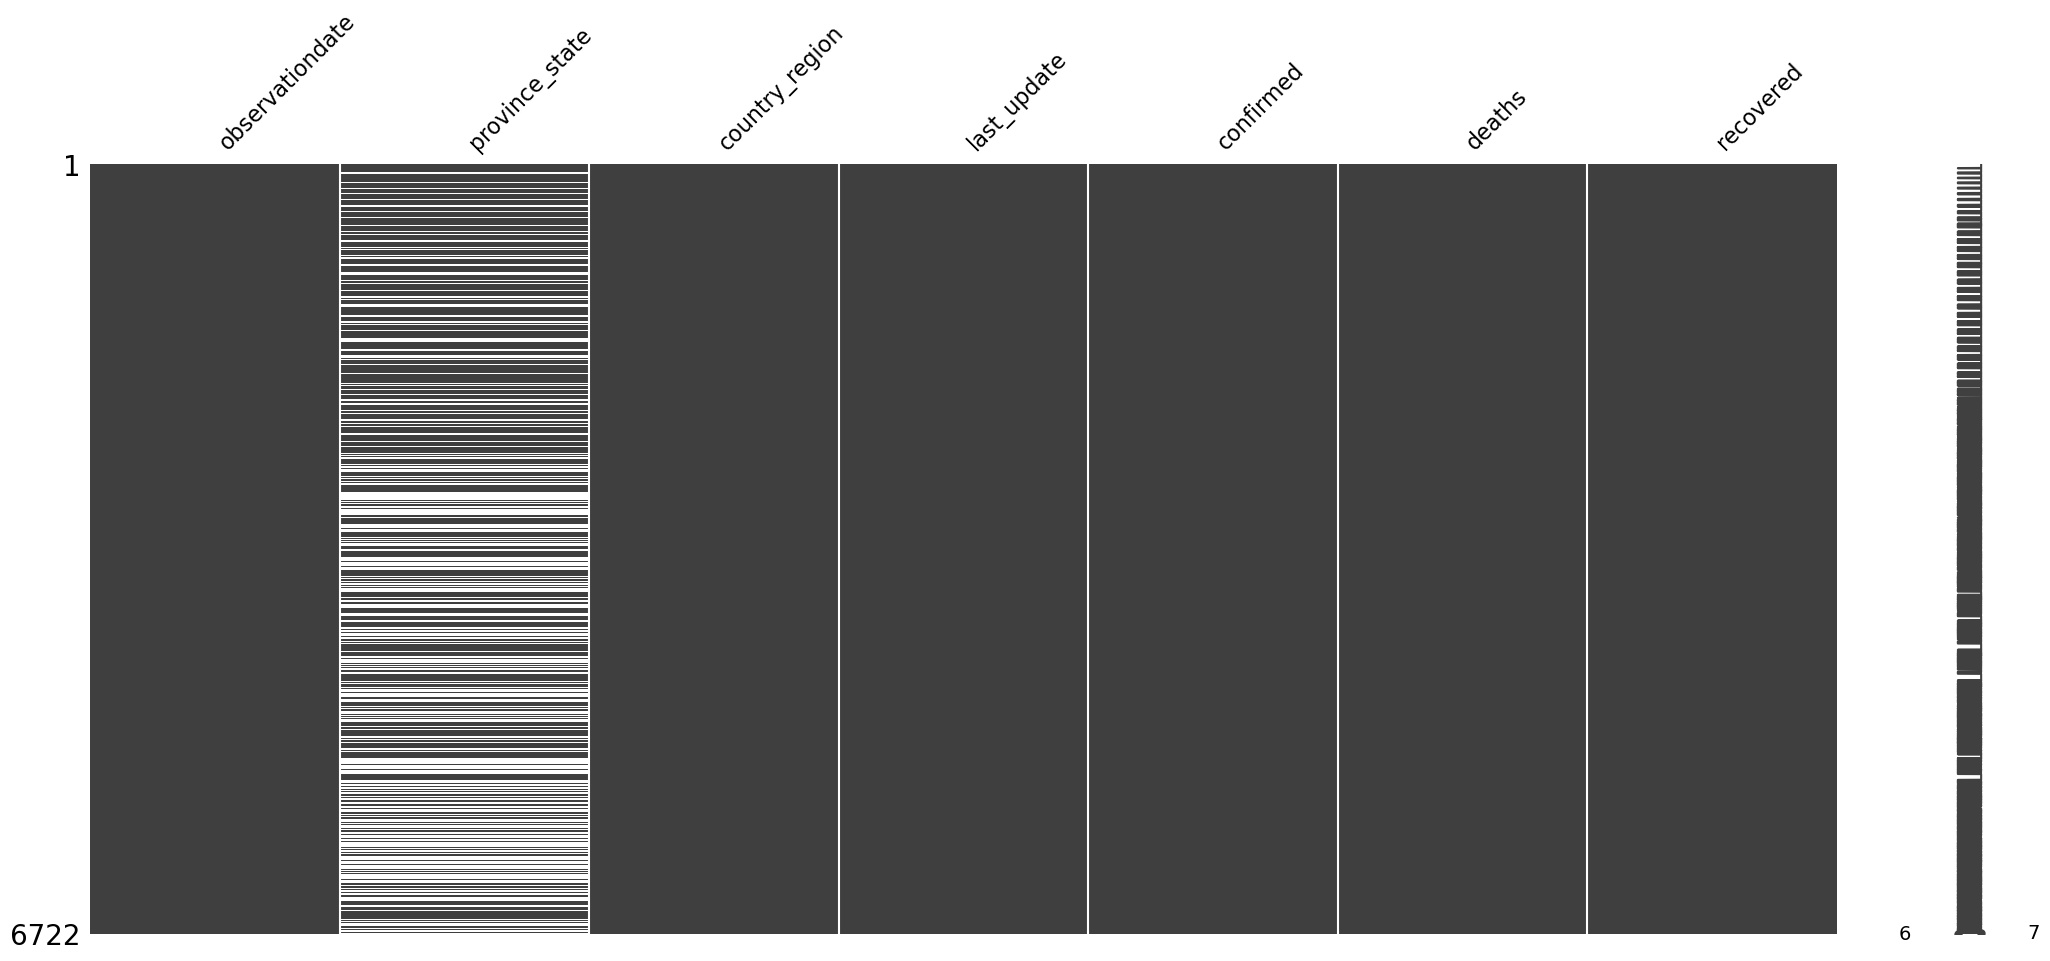

In [156]:
msno.matrix(df)

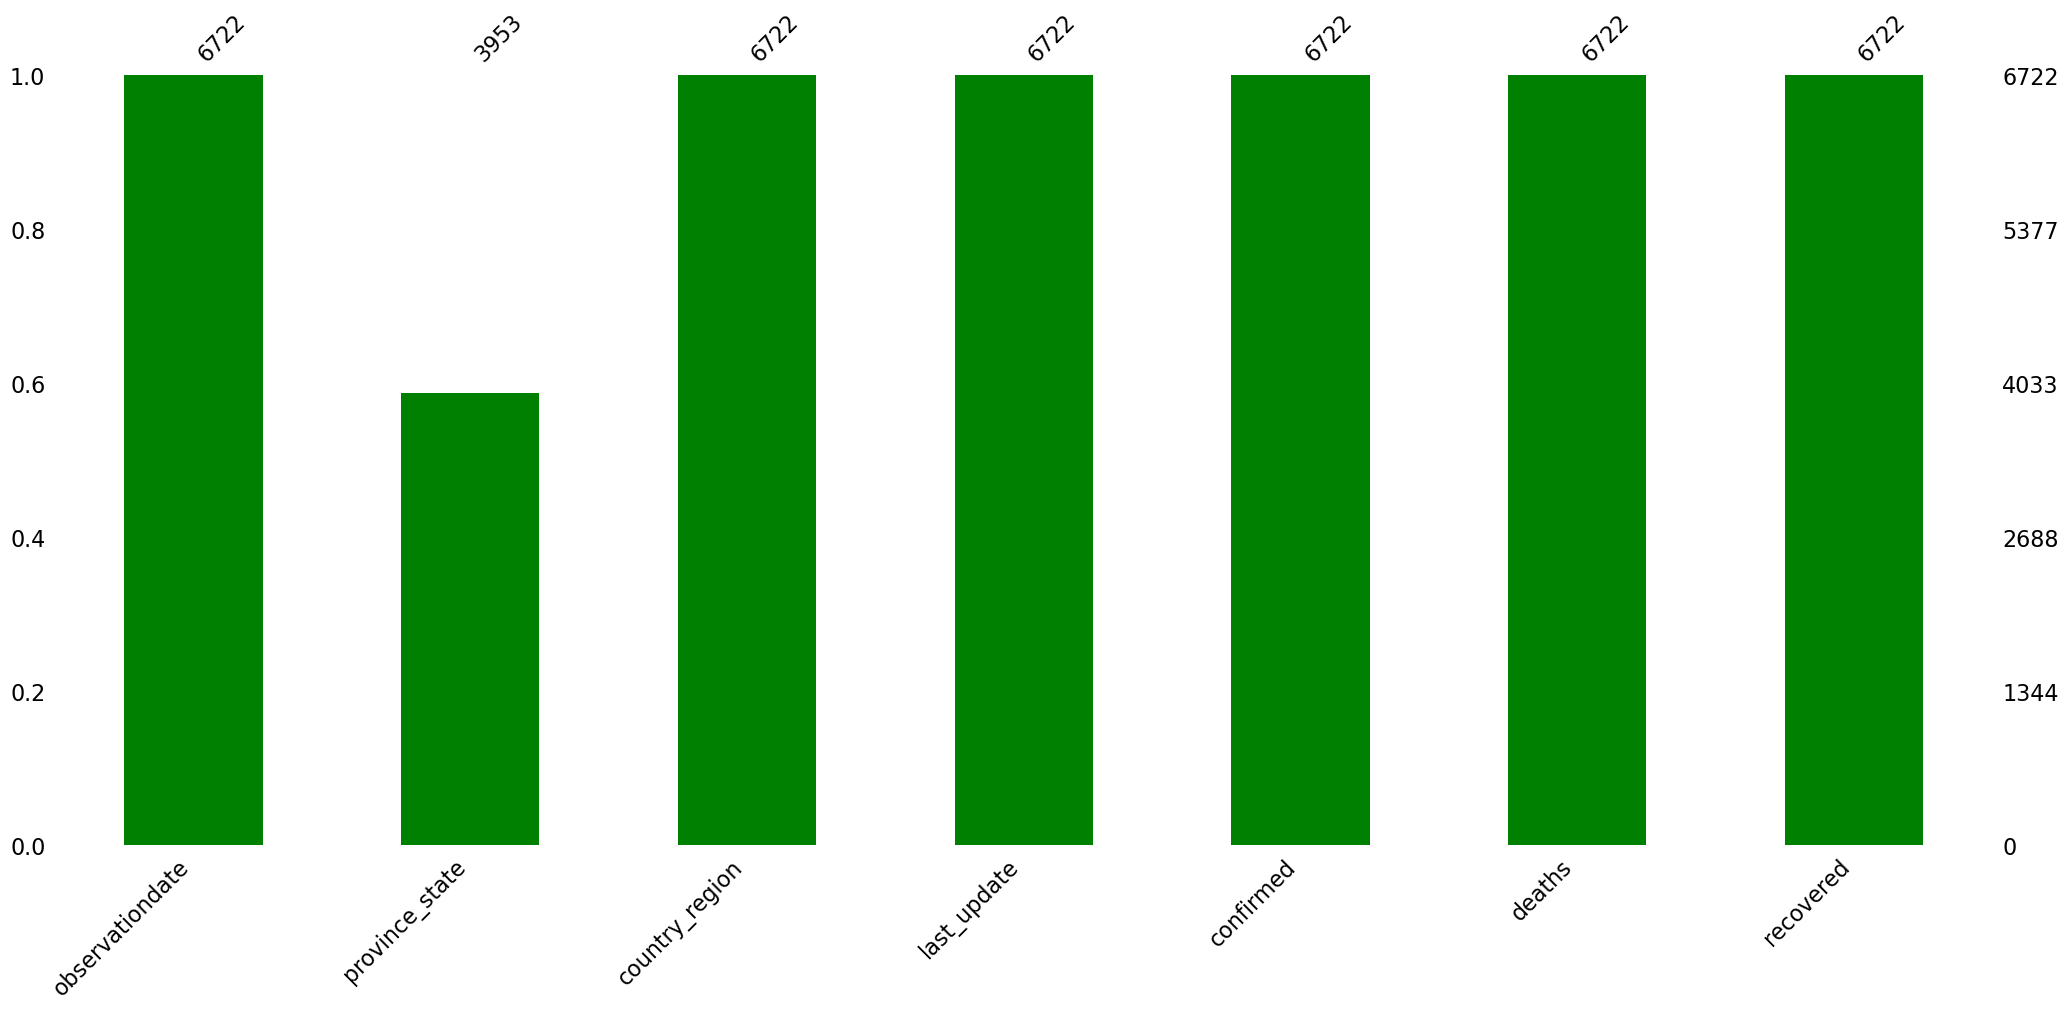

In [157]:
msno.bar(df, color='g');
# is not okay fill 40% of column, 5-10% is okay

In [158]:
new_values = {
    'observationdate': 'observation_date',
    
    'province_state': 'province',
    'country_region': 'country',
}
    

In [159]:
df.rename(columns=new_values,inplace=True)

In [160]:
df.columns

Index(['observation_date', 'province', 'country', 'last_update', 'confirmed',
       'deaths', 'recovered'],
      dtype='object')

In [161]:
df.head()

,observation_date,province,country,last_update,confirmed,deaths,recovered
sno,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# Country column analyze

In [162]:
sorted(df.country.unique())

[' Azerbaijan',
 "('St. Martin',)",
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Channel Islands',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Holy See',
 'Honduras

In [163]:
def change_country(country):
    country=country.lower().strip()
    if 'st.martin' in country:
        return 'st.martin'
    return country

In [164]:
df['country']=df['country'].apply(change_country)

In [165]:
sorted(df.country.unique())

["('st. martin',)",
 'afghanistan',
 'albania',
 'algeria',
 'andorra',
 'antigua and barbuda',
 'argentina',
 'armenia',
 'aruba',
 'australia',
 'austria',
 'azerbaijan',
 'bahrain',
 'bangladesh',
 'barbados',
 'belarus',
 'belgium',
 'benin',
 'bhutan',
 'bolivia',
 'bosnia and herzegovina',
 'brazil',
 'brunei',
 'bulgaria',
 'burkina faso',
 'cambodia',
 'cameroon',
 'canada',
 'cayman islands',
 'central african republic',
 'channel islands',
 'chile',
 'colombia',
 'congo (brazzaville)',
 'congo (kinshasa)',
 'costa rica',
 'croatia',
 'cuba',
 'curacao',
 'cyprus',
 'czech republic',
 'denmark',
 'djibouti',
 'dominican republic',
 'ecuador',
 'egypt',
 'equatorial guinea',
 'estonia',
 'eswatini',
 'ethiopia',
 'faroe islands',
 'finland',
 'france',
 'french guiana',
 'gabon',
 'gambia, the',
 'georgia',
 'germany',
 'ghana',
 'gibraltar',
 'greece',
 'greenland',
 'guadeloupe',
 'guam',
 'guatemala',
 'guernsey',
 'guinea',
 'guyana',
 'holy see',
 'honduras',
 'hong kong',

# End of Cleaning

In [166]:
df.head()

,observation_date,province,country,last_update,confirmed,deaths,recovered
sno,,,,,,,
1,01/22/2020,Anhui,mainland china,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,mainland china,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,mainland china,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,mainland china,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,mainland china,1/22/2020 17:00,0.0,0.0,0.0


In [167]:
df_pure = copy.deepcopy(df[['observation_date','country','confirmed','deaths','recovered']])

In [168]:
df_pure.sample(10, random_state=101)

,observation_date,country,confirmed,deaths,recovered
sno,,,,,
1424,02/14/2020,mainland china,537.0,5.0,152.0
5779,03/15/2020,us,17.0,0.0,0.0
1030,02/08/2020,uk,3.0,0.0,0.0
3337,03/04/2020,hungary,2.0,0.0,0.0
407,01/30/2020,mainland china,1.0,0.0,0.0
5987,03/16/2020,slovakia,63.0,0.0,0.0
2660,02/28/2020,us,2.0,0.0,0.0
2946,03/02/2020,italy,2036.0,52.0,149.0
4217,03/08/2020,us,1.0,0.0,0.0


In [169]:
df['country'].nunique()

178

In [170]:
# 1. in real case, we have to build timeseries model.
# 2. We have to do OHE (One Hot Encoder) but unique values are a lot, LE comes to stage.

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_pure['country'] = encoder.fit_transform(df_pure['country'])

In [171]:
df_pure.sample(10, random_state=101)

,observation_date,country,confirmed,deaths,recovered
sno,,,,,
1424,02/14/2020,97,537.0,5.0,152.0
5779,03/15/2020,172,17.0,0.0,0.0
1030,02/08/2020,168,3.0,0.0,0.0
3337,03/04/2020,71,2.0,0.0,0.0
407,01/30/2020,97,1.0,0.0,0.0
5987,03/16/2020,147,63.0,0.0,0.0
2660,02/28/2020,172,2.0,0.0,0.0
2946,03/02/2020,79,2036.0,52.0,149.0
4217,03/08/2020,172,1.0,0.0,0.0


In [172]:
df_pure.head()

,observation_date,country,confirmed,deaths,recovered
sno,,,,,
1,01/22/2020,97,1.0,0.0,0.0
2,01/22/2020,97,14.0,0.0,0.0
3,01/22/2020,97,6.0,0.0,0.0
4,01/22/2020,97,1.0,0.0,0.0
5,01/22/2020,97,0.0,0.0,0.0


# Preprocessing

In [173]:
df_pure.drop('country',axis=1, inplace=True)

In [174]:
df_pure.head()

,observation_date,confirmed,deaths,recovered
sno,,,,
1,01/22/2020,1.0,0.0,0.0
2,01/22/2020,14.0,0.0,0.0
3,01/22/2020,6.0,0.0,0.0
4,01/22/2020,1.0,0.0,0.0
5,01/22/2020,0.0,0.0,0.0


In [175]:
# group by according to observation_date. Because there are same dates in dataset. (for different countries) 
# groub by 
df_pure=df_pure.groupby (['observation_date']).sum().copy()

In [176]:
df_pure.head()

,confirmed,deaths,recovered
observation_date,,,
01/22/2020,555.0,17.0,28.0
01/23/2020,653.0,18.0,30.0
01/24/2020,941.0,26.0,36.0
01/25/2020,1438.0,42.0,39.0
01/26/2020,2118.0,56.0,52.0


In [177]:
df_pure=df_pure.reset_index()

In [178]:
df_pure.head()

,observation_date,confirmed,deaths,recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0


In [179]:
df_pure.shape

(57, 4)

In [180]:
df_pure.head()

,observation_date,confirmed,deaths,recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0


In [181]:
df_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  57 non-null     object 
 1   confirmed         57 non-null     float64
 2   deaths            57 non-null     float64
 3   recovered         57 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.9+ KB


In [182]:
df_pure['observation_date']=pd.to_datetime(df_pure['observation_date'])

In [183]:
df_pure.head()

,observation_date,confirmed,deaths,recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1438.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0


In [184]:
df_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  57 non-null     datetime64[ns]
 1   confirmed         57 non-null     float64       
 2   deaths            57 non-null     float64       
 3   recovered         57 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.9 KB


# Feature Engineering

In [185]:
# change date column to days, for creating linear model.
# Data is suitable for that, days are in sequence, but if there are holidays or weekends problems will occur :)

x = df_pure['observation_date'].max()
n = df_pure['observation_date'].min()


In [186]:
(x - n)


Timedelta('56 days 00:00:00')

In [187]:
(x - n).days

56

In [188]:
# 0th day - some number is not okay as logic, for that reason +1
def subtraction(date):
    return (date - n).days + 1


In [189]:
df_pure['day_counter'] = df_pure['observation_date'].apply(lambda x: subtraction(x))
df_pure.drop(['observation_date'], axis=1, inplace=True)


In [190]:
df_pure.head()

,confirmed,deaths,recovered,day_counter
0,555.0,17.0,28.0,1
1,653.0,18.0,30.0,2
2,941.0,26.0,36.0,3
3,1438.0,42.0,39.0,4
4,2118.0,56.0,52.0,5


In [191]:
df_pure['yeni_sutun'] = range(1,df_pure.shape[0]+1)

In [192]:
df_pure.head()

,confirmed,deaths,recovered,day_counter,yeni_sutun
0,555.0,17.0,28.0,1,1
1,653.0,18.0,30.0,2,2
2,941.0,26.0,36.0,3,3
3,1438.0,42.0,39.0,4,4
4,2118.0,56.0,52.0,5,5


In [193]:
df=copy.deepcopy(data)

In [194]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [195]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [196]:
df.drop(['SNo','Province/State','Country/Region','Last Update'],axis=1,inplace=True)

In [197]:
df.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,1.0,0.0,0.0
1,01/22/2020,14.0,0.0,0.0
2,01/22/2020,6.0,0.0,0.0
3,01/22/2020,1.0,0.0,0.0
4,01/22/2020,0.0,0.0,0.0


In [198]:
df=df.groupby(['ObservationDate']).sum().copy()

In [199]:
df_pure.head()

,confirmed,deaths,recovered,day_counter,yeni_sutun
0,555.0,17.0,28.0,1,1
1,653.0,18.0,30.0,2,2
2,941.0,26.0,36.0,3,3
3,1438.0,42.0,39.0,4,4
4,2118.0,56.0,52.0,5,5


In [200]:
df=df.reset_index()

In [201]:
df.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0


In [203]:
df.drop('ObservationDate',axis=1,inplace=True)

In [204]:
df.head()

,Confirmed,Deaths,Recovered
0,555.0,17.0,28.0
1,653.0,18.0,30.0
2,941.0,26.0,36.0
3,1438.0,42.0,39.0
4,2118.0,56.0,52.0


In [205]:
df_pure=df.copy()

In [206]:
df_pure.shape

(57, 3)

In [210]:
# extra
df_pure['day_counter']=range(1,58)

In [211]:
df_pure

,Confirmed,Deaths,Recovered,yeni_column,day_counter
0,555.0,17.0,28.0,1,1
1,653.0,18.0,30.0,2,2
2,941.0,26.0,36.0,3,3
3,1438.0,42.0,39.0,4,4
4,2118.0,56.0,52.0,5,5
5,2927.0,82.0,61.0,6,6
6,5578.0,131.0,107.0,7,7
7,6165.0,133.0,126.0,8,8
8,8235.0,171.0,143.0,9,9
9,9925.0,213.0,222.0,10,10


In [212]:
# add infected column
df_pure['infected'] = df_pure['Confirmed'] - (df_pure['Recovered'] + df_pure['Deaths'])


In [213]:
df_pure.tail()


,Confirmed,Deaths,Recovered,yeni_column,day_counter,infected
52,156099.0,5819.0,72624.0,53,53,77656.0
53,167447.0,6440.0,76034.0,54,54,84973.0
54,181546.0,7126.0,78088.0,55,55,96332.0
55,197168.0,7905.0,80840.0,56,56,108423.0
56,214915.0,8733.0,83313.0,57,57,122869.0


In [214]:
df_pure.drop('yeni_column', axis=1, inplace=True)


In [215]:
df_pure.tail()


,Confirmed,Deaths,Recovered,day_counter,infected
52,156099.0,5819.0,72624.0,53,77656.0
53,167447.0,6440.0,76034.0,54,84973.0
54,181546.0,7126.0,78088.0,55,96332.0
55,197168.0,7905.0,80840.0,56,108423.0
56,214915.0,8733.0,83313.0,57,122869.0


In [216]:
df_pure = df_pure[['day_counter', 'Confirmed', 'Deaths', 'Recovered', 'infected']]


In [217]:
df_pure.columns=df_pure.columns.str.lower()

In [218]:
df_pure.head()

,day_counter,confirmed,deaths,recovered,infected
0,1,555.0,17.0,28.0,510.0
1,2,653.0,18.0,30.0,605.0
2,3,941.0,26.0,36.0,879.0
3,4,1438.0,42.0,39.0,1357.0
4,5,2118.0,56.0,52.0,2010.0


# Confirmed Prediction

In [231]:
y=df_pure['confirmed']
X=df_pure[['day_counter']]

In [232]:
type(df_pure['confirmed'])

pandas.core.series.Series

In [233]:
type(df_pure[['confirmed']])

pandas.core.frame.DataFrame

# Train-Test Split

In [234]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)


# Modelling

In [248]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [249]:
model

LinearRegression()

# Predictions and Metrics

In [250]:
y_p=model.predict(X_test)

In [238]:
y_test

45    105836.0
46    109835.0
47    113582.0
48    118582.0
49    125865.0
50    128343.0
51    145193.0
52    156099.0
53    167447.0
54    181546.0
55    197168.0
56    214915.0
Name: confirmed, dtype: float64

In [251]:
# we can give mean as prediction from beginning, R2 score shows how my modelling improved the result.
# (70% and more is Okay generally)

R2 = r2_score(y_true=y_test, y_pred=y_p)
print("R2_score:", R2)


R2_score: -0.030541370145990454


In [252]:
# creating adj r2 score formula
n = X_test.shape[0]    # sample size
p = X_test.shape[1]    # number of predictors


In [253]:
adj_R2_score = 1 - (1 - R2) * (n - 1) / (n - 1 - p)
print("Adjusted R2 Score:", adj_R2_score)

Adjusted R2 Score: -0.13359550716058943


In [254]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_p)
print("Mean Squared Error:", MSE)


Mean Squared Error: 1255684927.567046


In [255]:
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)


Root Mean Squared Error: 35435.64487302363


In [260]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_p)
print("Mean Absolute Error:", MAE)


Mean Absolute Error: 24708.904589371978


In [261]:
# real_value - % of real_value / real_value + % of real_value
MAPE = mean_absolute_percentage_error(y_true=y_test, y_pred=y_p)
print("Mean Absolute Percentage Error:", MAPE)


Mean Absolute Percentage Error: 0.13915022211364217


# Visualisation

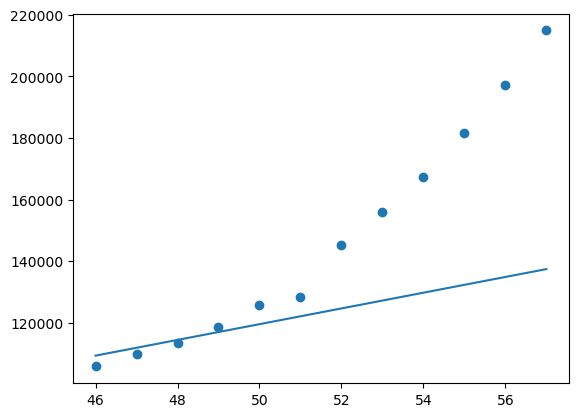

In [262]:
# uzerinde prediction verdiyi noqteleti goruruk
# model - xett
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test,y_p)
plt.show()

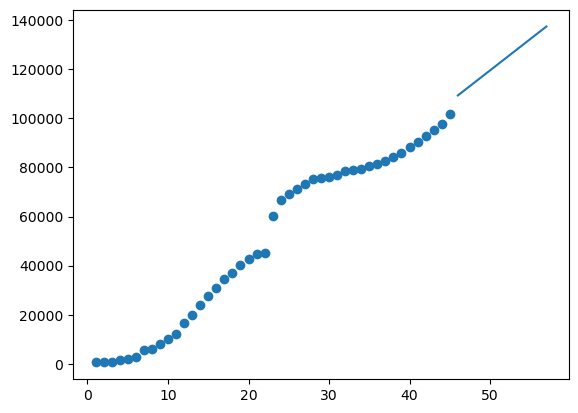

In [264]:
plt.scatter(x=X_train,y=y_train)
plt.plot(X_test,y_p)
plt.show()

# Death Prediction

In [265]:
df_pure.head()

,day_counter,confirmed,deaths,recovered,infected
0,1,555.0,17.0,28.0,510.0
1,2,653.0,18.0,30.0,605.0
2,3,941.0,26.0,36.0,879.0
3,4,1438.0,42.0,39.0,1357.0
4,5,2118.0,56.0,52.0,2010.0


# Train-Test Split

In [266]:
y=df_pure['deaths']
X=df_pure[['day_counter']]

In [267]:
type(df_pure['deaths'])

pandas.core.series.Series

In [268]:
type(df_pure[['deaths']])

pandas.core.frame.DataFrame

In [283]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)


# Modeling

In [284]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [285]:
model

LinearRegression()

# Predictions and Metrics

In [286]:
y_p=model.predict(X_test)

In [287]:
y_test

0       17.0
5       82.0
30    2251.0
13     492.0
34    2708.0
55    7905.0
27    2007.0
31    2458.0
45    3558.0
12     426.0
47    3996.0
3       42.0
Name: deaths, dtype: float64

In [288]:
# we can give mean as prediction from beginning, R2 score shows how my modelling improved the result.
# (70% and more is Okay generally)

R2 = r2_score(y_true=y_test, y_pred=y_p)
print("R2_score:", R2)


R2_score: 0.8479885284246185


In [289]:
# creating adj r2 score formula
n = X_test.shape[0]    # sample size
p = X_test.shape[1]    # number of predictors

In [290]:
adj_R2_score = 1 - (1 - R2) * (n - 1) / (n - 1 - p)
print("Adjusted R2 Score:", adj_R2_score)

Adjusted R2 Score: 0.8327873812670803


In [291]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_p)
print("Mean Squared Error:", MSE)


Mean Squared Error: 733917.9677071691


In [292]:
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)


Root Mean Squared Error: 856.690123502757


In [293]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_p)
print("Mean Absolute Error:", MAE)


Mean Absolute Error: 592.9714142292252


In [294]:
# real_value - % of real_value / real_value + % of real_value
MAPE = mean_absolute_percentage_error(y_true=y_test, y_pred=y_p)
print("Mean Absolute Percentage Error:", MAPE)


Mean Absolute Percentage Error: 7.401959700746763


# Visualisation

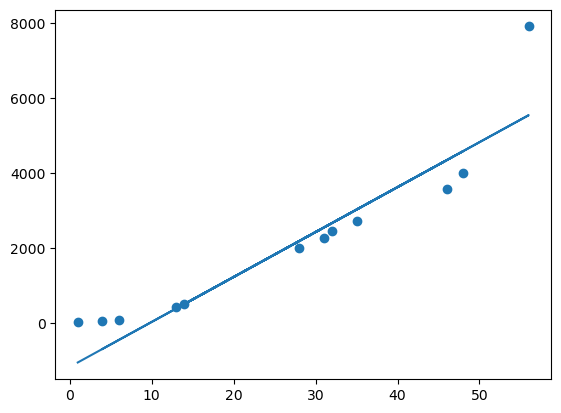

In [295]:
# uzerinde prediction verdiyi noqteleti goruruk
# model - xett
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test,y_p)
plt.show()

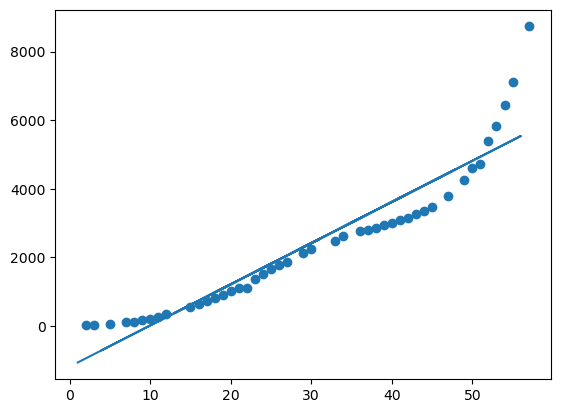

In [296]:
plt.scatter(x=X_train,y=y_train)
plt.plot(X_test,y_p)
plt.show()

# Recovered Prediction
## Train-Test Split

In [297]:
y=df_pure['recovered']
X=df_pure[['day_counter']]

In [298]:
type(df_pure['recovered'])

pandas.core.series.Series

In [299]:
type(df_pure[['recovered']])

pandas.core.frame.DataFrame

In [300]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)


# Modeling

In [301]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [302]:
model

LinearRegression()

# Predictions and Metrics

In [303]:
y_p=model.predict(X_test)

In [304]:
y_test

0        28.0
5        61.0
30    18890.0
13      852.0
34    27905.0
55    80840.0
27    14352.0
31    22886.0
45    58359.0
12      623.0
47    62512.0
3        39.0
Name: recovered, dtype: float64

In [305]:
# we can give mean as prediction from beginning, R2 score shows how my modelling improved the result.
# (70% and more is Okay generally)

R2 = r2_score(y_true=y_test, y_pred=y_p)
print("R2_score:", R2)


R2_score: 0.8568471450120798


In [306]:
# creating adj r2 score formula
n = X_test.shape[0]    # sample size
p = X_test.shape[1]    # number of predictors

In [307]:
adj_R2_score = 1 - (1 - R2) * (n - 1) / (n - 1 - p)
print("Adjusted R2 Score:", adj_R2_score)

Adjusted R2 Score: 0.8425318595132878


In [308]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_p)
print("Mean Squared Error:", MSE)


Mean Squared Error: 105388263.08222407


In [309]:
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)


Root Mean Squared Error: 10265.878583064583


In [310]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_p)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 8733.507061657923


In [311]:
# real_value - % of real_value / real_value + % of real_value
MAPE = mean_absolute_percentage_error(y_true=y_test, y_pred=y_p)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 108.35155096998342


# Visualisation

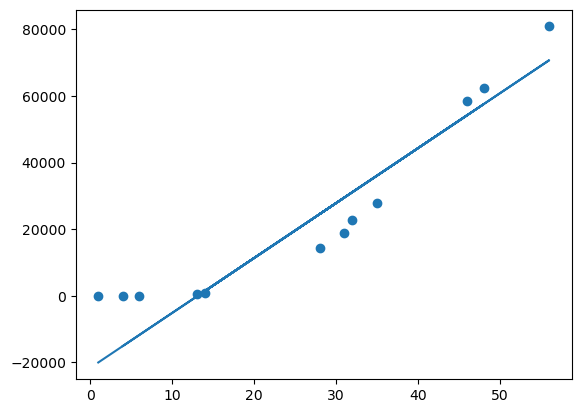

In [312]:
# uzerinde prediction verdiyi noqteleti goruruk
# model - xett
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test,y_p)
plt.show()

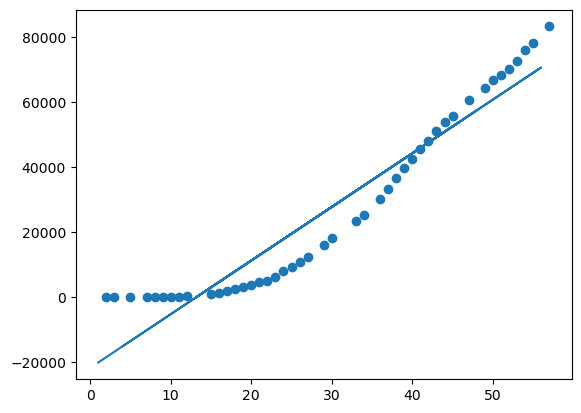

In [313]:
plt.scatter(x=X_train,y=y_train)
plt.plot(X_test,y_p)
plt.show()

# Infected Prediction
## Train-Test Split

In [314]:
y=df_pure['infected']
X=df_pure[['day_counter']]

In [315]:
type(df_pure['infected'])

pandas.core.series.Series

In [316]:
type(df_pure[['infected']])

pandas.core.frame.DataFrame

In [317]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)


# Model

In [318]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [319]:
model

LinearRegression()

# Predictions and Metrics

In [320]:
y_p=model.predict(X_test)

In [321]:
y_test

0        510.0
5       2784.0
30     55702.0
13     22548.0
34     49802.0
55    108423.0
27     58779.0
31     53255.0
45     43919.0
12     18832.0
47     47074.0
3       1357.0
Name: infected, dtype: float64

In [322]:
# we can give mean as prediction from beginning, R2 score shows how my modelling improved the result.
# (70% and more is Okay generally)

R2 = r2_score(y_true=y_test, y_pred=y_p)
print("R2_score:", R2)


R2_score: 0.7665915348052685


In [323]:
# creating adj r2 score formula
n = X_test.shape[0]    # sample size
p = X_test.shape[1]    # number of predictors

In [324]:
adj_R2_score = 1 - (1 - R2) * (n - 1) / (n - 1 - p)
print("Adjusted R2 Score:", adj_R2_score)

Adjusted R2 Score: 0.7432506882857954


In [325]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_p)
print("Mean Squared Error:", MSE)


Mean Squared Error: 209763948.83367229


In [326]:
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)


Root Mean Squared Error: 14483.229917172215


In [327]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_p)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 11302.393041045447


In [328]:
# real_value - % of real_value / real_value + % of real_value
MAPE = mean_absolute_percentage_error(y_true=y_test, y_pred=y_p)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 1.9405542887868057


# Visualisation

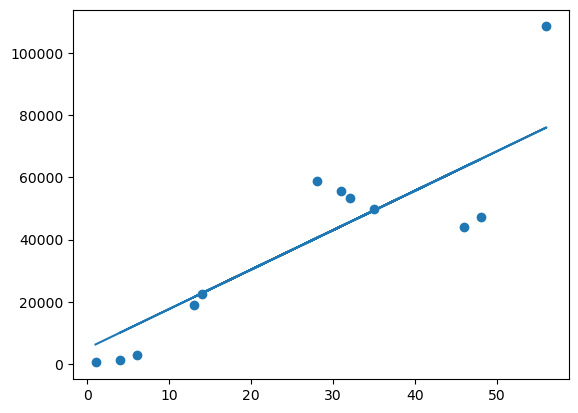

In [329]:
# uzerinde prediction verdiyi noqteleti goruruk
# model - xett
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test,y_p)
plt.show()

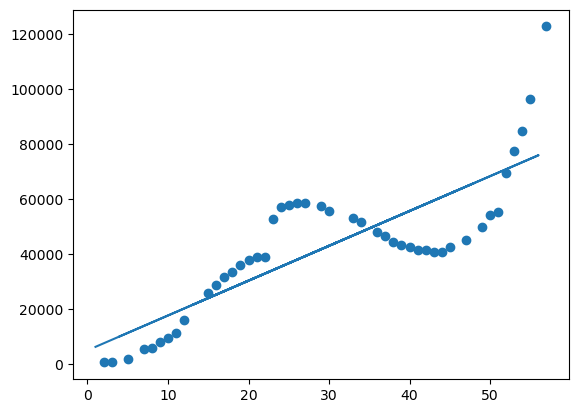

In [330]:
plt.scatter(x=X_train,y=y_train)
plt.plot(X_test,y_p)
plt.show()